In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sb

df = pd.read_csv('/workspaces/repos/Semana_09/processDf.csv')
df

,Time Lapse (hr),Image Number,Total Size (mb)
0,0.40,50,290
1,0.79,100,579
2,1.22,150,869
3,NaN,200,1162
4,2.18,250,1460
...,...,...,...
94,NaN,4750,26893
95,31.63,4800,27139
96,31.87,4850,27385
97,32.11,4900,27631


In [14]:
#Se muestran la cantidad de filas y columnas
filas, columnas=df.shape
print("Filas: ",filas)
print("Columnas: ",columnas)


Filas:  99
Columnas:  3


In [10]:
#Se muestra informacion del Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Lapse (hr)  77 non-null     float64
 1   Image Number     99 non-null     int64  
 2   Total Size (mb)  99 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.4 KB


In [12]:
#Tipos de datos del Data Frame
df.dtypes

Time Lapse (hr)    float64
Image Number         int64
Total Size (mb)      int64
dtype: object

<Axes: >

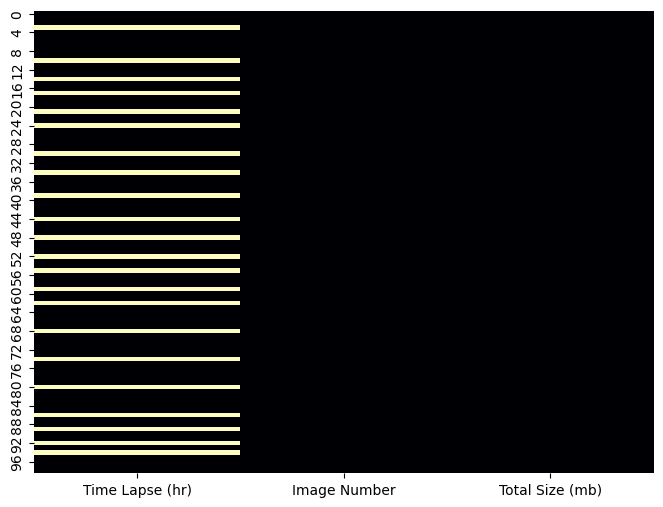

In [19]:
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [18]:
#Cantidad de datos nulos
df.isnull().sum()

Time Lapse (hr)    22
Image Number        0
Total Size (mb)     0
dtype: int64

In [22]:
conteo_repeticiones = df.duplicated().sum()
print(f"El número de filas duplicadas en el DataFrame es: {conteo_repeticiones}")

El número de filas duplicadas en el DataFrame es: 0


In [2]:
#Importación de DataFrame a un nuevo DataFrame eliminando datos nulos
df_new = df.dropna()
df_new

,Time Lapse (hr),Image Number,Total Size (mb)
0,0.40,50,290
1,0.79,100,579
2,1.22,150,869
4,2.18,250,1460
5,2.74,300,1753
...,...,...,...
93,31.15,4700,26647
95,31.63,4800,27139
96,31.87,4850,27385
97,32.11,4900,27631


<Axes: >

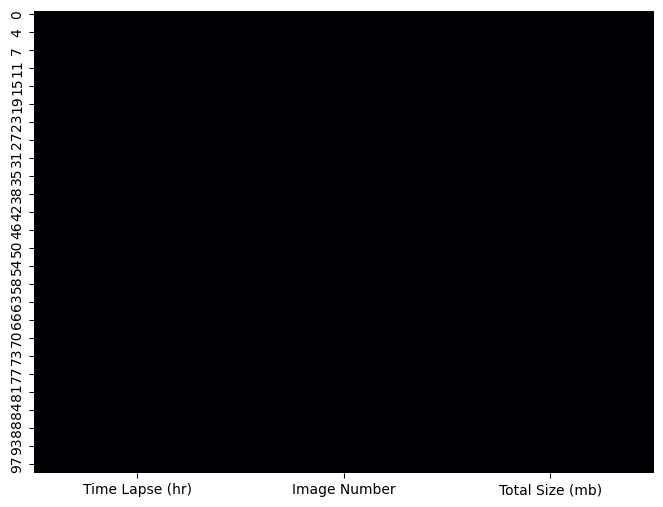

In [3]:
plt.figure(figsize = (8,6))
sb.heatmap(df_new.isnull(), cbar=False , cmap = 'magma')

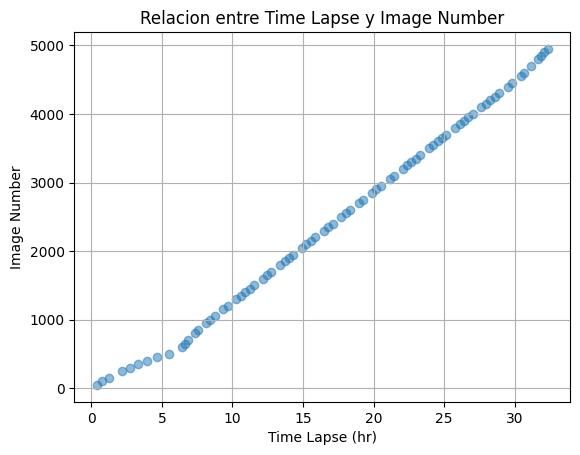

In [4]:
plt.scatter(df['Time Lapse (hr)'], df['Image Number'], alpha=0.5)
plt.title('Relacion entre Time Lapse y Image Number')
plt.xlabel('Time Lapse (hr)')
plt.ylabel('Image Number')
plt.grid(True)
plt.show()

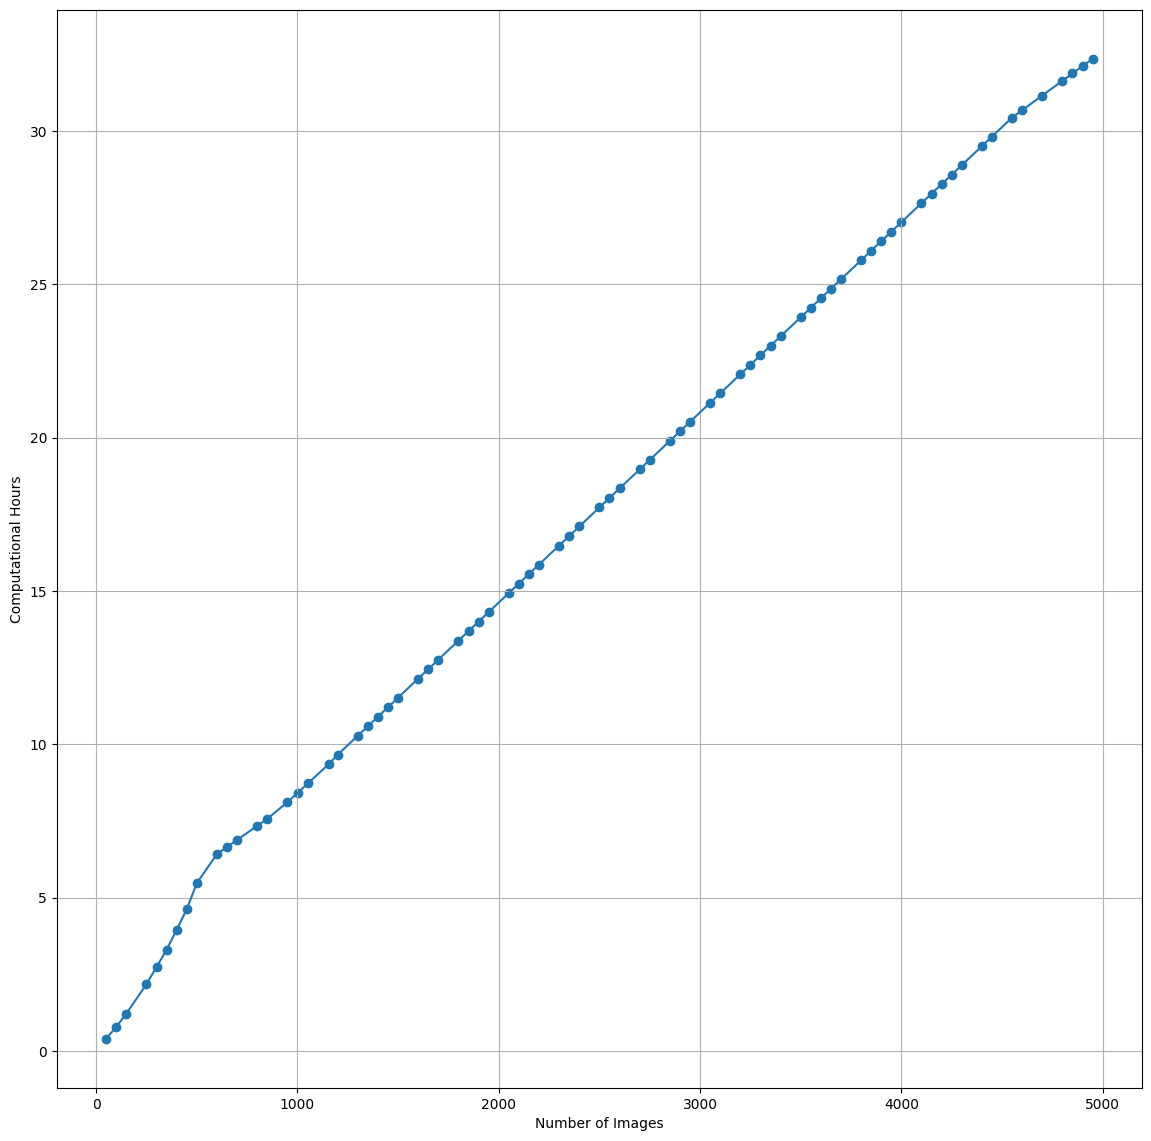

In [5]:
#Se  crea un gráfico de dispersión(con scatter) y un gráfico de líneas (con plot) a partir de los datos contenidos
fig = plt.figure(figsize=(14,14))
plt.scatter(df_new['Image Number'],df_new['Time Lapse (hr)'])
plt.plot(df_new['Image Number'],df_new['Time Lapse (hr)'])
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.grid()

In [13]:
#El modelo de regresión lineal de scikit-learn espera que los datos de entrada sean bidimensionales.
#Por es razón se usa .reshape(-1, 1) para convertir el arreglo 1D en un arreglo 2D
nImages = df_new['Image Number'].values.reshape(-1,1)
Hours = df_new['Time Lapse (hr)'].values.reshape(-1,1)
# Aquí se crea un objeto de regresión lineal utilizando la clase LinearRegression de scikit-learn. 
# Este objeto servirá para ajustar una línea recta a los datos y realizar predicciones.
linear_regressor = LinearRegression()
# El método .fit() toma las variables independientes (nImages) y las variables dependientes (Hours) 
# y encuentra los coeficientes que mejor ajustan una línea recta a los datos.
linear_regressor.fit(nImages, Hours)
#Basandonos en los nImages predeciremos las Hours_pred
Hours_pred = linear_regressor.predict(nImages)
Hours_pred

array([[ 2.10070612],
       [ 2.41635375],
       [ 2.73200138],
       [ 3.36329664],
       [ 3.67894427],
       [ 3.99459191],
       [ 4.31023954],
       [ 4.62588717],
       [ 4.9415348 ],
       [ 5.57283006],
       [ 5.88847769],
       [ 6.20412532],
       [ 6.83542058],
       [ 7.15106821],
       [ 7.78236347],
       [ 8.110637  ],
       [ 8.43259759],
       [ 9.07651875],
       [ 9.36060162],
       [ 9.99189688],
       [10.30754451],
       [10.62319214],
       [10.93883977],
       [11.2544874 ],
       [11.88578266],
       [12.20143029],
       [12.51707792],
       [13.14837318],
       [13.46402081],
       [13.77966844],
       [14.09531607],
       [14.72661133],
       [15.04225896],
       [15.35790659],
       [15.67355422],
       [16.30484948],
       [16.62049711],
       [16.93614474],
       [17.56744   ],
       [17.88308763],
       [18.19873526],
       [18.83003052],
       [19.14567815],
       [19.77697341],
       [20.09262104],
       [20

In [20]:
# Modelo de la regresion lineal 
V1 = linear_regressor.coef_[0][0]
V2 = linear_regressor.intercept_[0]
label = r'Hours = %0.4f*numberImages %+0.4f'%(V1,V2)
print(label)

Hours = 0.0063*numberImages +1.7851


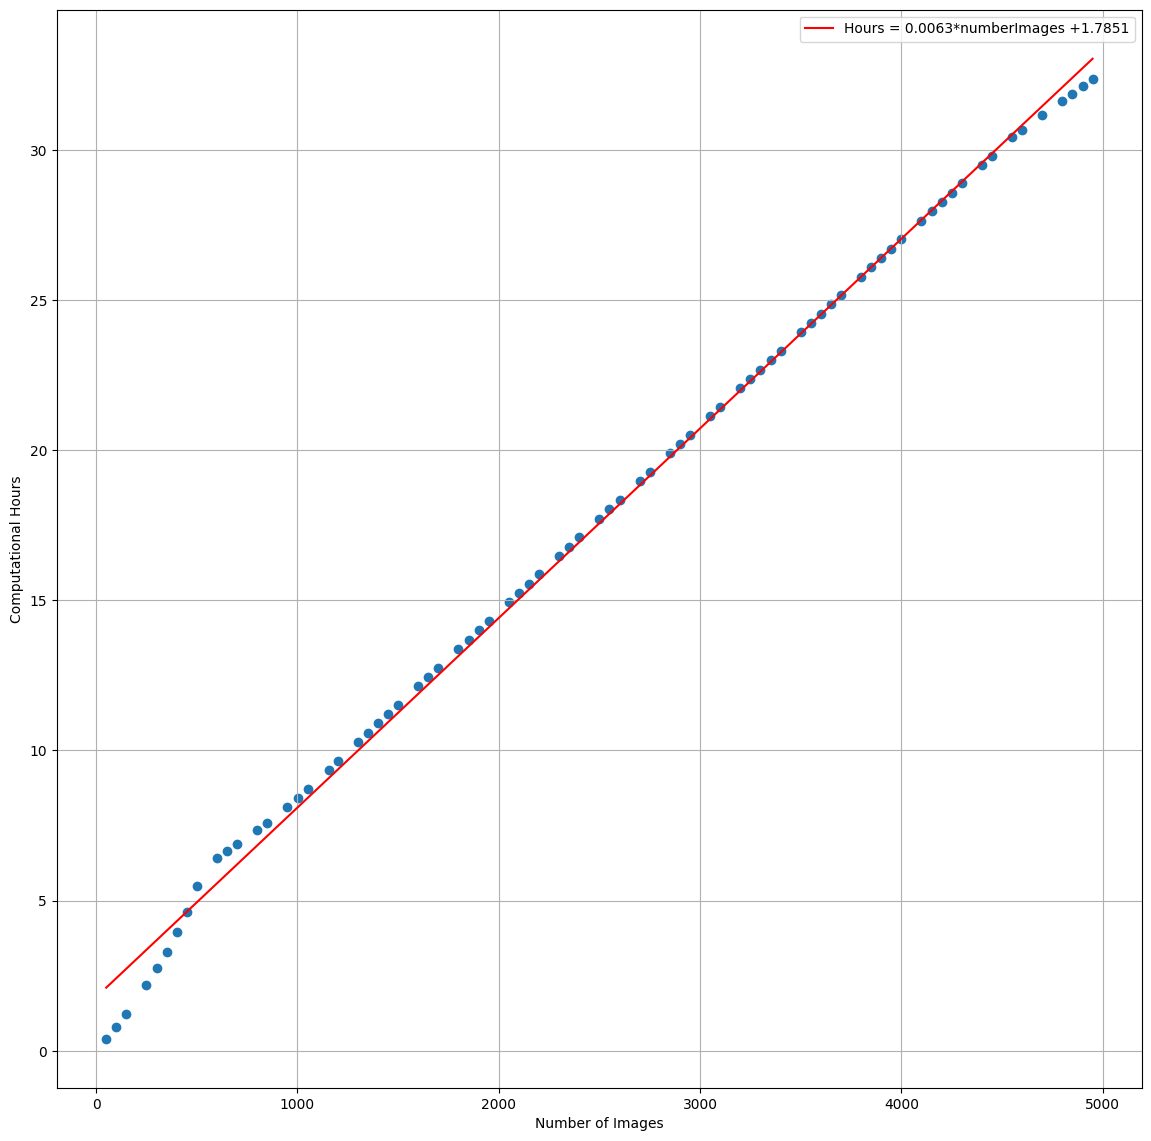

In [21]:
#Se agrega compara la dispersion de datos con la recta del modelo de regresion  lineal
fig = plt.figure(figsize=(14,14))
plt.scatter(df_new['Image Number'],df_new['Time Lapse (hr)'])
plt.plot(nImages, Hours_pred, color='red', label=label)
plt.xlabel('Number of Images')
plt.ylabel('Computational Hours')
plt.legend()
plt.grid()